# Librerie importate

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

#from statsmodels.tsa.seasonal import seasonal_decompose
#from scipy.stats import pearsonr

In [46]:
url = "/Users/daviderizzello/Documents/Data_Science_Projects/Time_Series/air+quality/AirQualityUCI.csv"
df = pd.read_csv(url, sep=';', decimal=',', parse_dates=[['Date', 'Time']], dayfirst=True)
df.rename(columns={'Date_Time': 'DateTime'}, inplace=True)

# Qualche info sul dataset
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

Date	(DD/MM/YYYY)

Time	(HH.MM.SS)

CO(GT)	Feature	Integer	**True** hourly averaged concentration CO in mg/m^3 (reference analyzer)	mg/m^3	

PT08.S1(CO)	Feature	Categorical	hourly averaged sensor response (nominally CO targeted)		

NMHC(GT)	Feature	Integer	**True** hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)	microg/m^3	

C6H6(GT)	Feature	Continuous	**True** hourly averaged Benzene concentration in microg/m^3 (reference analyzer)	microg/m^3	

PT08.S2(NMHC)	Feature	Categorical	hourly averaged sensor response (nominally NMHC targeted)		

NOx(GT)	Feature	Integer	**True** hourly averaged NOx concentration in ppb (reference analyzer)	ppb	

PT08.S3(NOx)	Feature	Categorical	hourly averaged sensor response (nominally NOx targeted)		

NO2(GT)	Feature	Integer	**True** hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	microg/m^3	

PT08.S4(NO2)	Feature	Categorical	hourly averaged sensor response (nominally NO2 targeted)		

PT08.S5(O3)	Feature	Categorical	hourly averaged sensor response (nominally O3 targeted)		

T	Feature	Continuous	Temperature	°C	

RH	Feature	Continuous	Relative Humidity	%	

AH	Feature	Continuous	Absolute Humidity	

# Analisi Esplorativa +  pre-processing base

In [47]:
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [48]:
df.tail()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       9471 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
 14  Unnamed: 15    0 non-null      float64
 15  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(1)
memory usage: 1.2+ MB


In [50]:
df.shape

(9471, 16)

In [51]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [52]:
df = df.drop(['Unnamed: 15', "Unnamed: 16"], axis = 1)
df = df.dropna(axis=0)

CO(GT) ↔ PT08.S1(CO)
NMHC(GT) ↔ PT08.S2(NMHC)
NOx(GT) ↔ PT08.S3(NOx)
NO2(GT) ↔ PT08.S4(NO2)


In [53]:
df = df.rename(columns={'PT08.S1(CO)': 'CO_s', 'PT08.S2(NMHC)': 'NMHC_s', 'PT08.S3(NOx)':'NOx_s', 'PT08.S4(NO2)':'NO2_s', 'PT08.S5(O3)':'O3_s'})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  9357 non-null   object 
 1   CO(GT)    9357 non-null   float64
 2   CO_s      9357 non-null   float64
 3   NMHC(GT)  9357 non-null   float64
 4   C6H6(GT)  9357 non-null   float64
 5   NMHC_s    9357 non-null   float64
 6   NOx(GT)   9357 non-null   float64
 7   NOx_s     9357 non-null   float64
 8   NO2(GT)   9357 non-null   float64
 9   NO2_s     9357 non-null   float64
 10  O3_s      9357 non-null   float64
 11  T         9357 non-null   float64
 12  RH        9357 non-null   float64
 13  AH        9357 non-null   float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [55]:
df.dtypes

DateTime     object
CO(GT)      float64
CO_s        float64
NMHC(GT)    float64
C6H6(GT)    float64
NMHC_s      float64
NOx(GT)     float64
NOx_s       float64
NO2(GT)     float64
NO2_s       float64
O3_s        float64
T           float64
RH          float64
AH          float64
dtype: object

In [56]:
print(df['DateTime'].dtype)

object


In [57]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H.%M.%S', errors='coerce', dayfirst=True)


In [58]:
print(df['DateTime'].dtype)

datetime64[ns]


In [59]:
df.head(10)

,DateTime,CO(GT),CO_s,NMHC(GT),C6H6(GT),NMHC_s,NOx(GT),NOx_s,NO2(GT),NO2_s,O3_s,T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11 00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11 01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11 02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11 03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [60]:
df = df.set_index('DateTime')


In [61]:
df.sort_index()

,CO(GT),CO_s,NMHC(GT),C6H6(GT),NMHC_s,NOx(GT),NOx_s,NO2(GT),NO2_s,O3_s,T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [62]:
df['hour'] = df.index.hour
df['day'] = df.index.day_name()
df['month'] = df.index.month
df['year'] = df.index.year

In [63]:
df

,CO(GT),CO_s,NMHC(GT),C6H6(GT),NMHC_s,NOx(GT),NOx_s,NO2(GT),NO2_s,O3_s,T,RH,AH,hour,day,month,year
DateTime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,Wednesday,3,2004
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,Wednesday,3,2004
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,Wednesday,3,2004
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,Wednesday,3,2004
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,Wednesday,3,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,Monday,4,2005
2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,Monday,4,2005
2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,Monday,4,2005


In [64]:
df.nunique()

CO(GT)        97
CO_s        1042
NMHC(GT)     430
C6H6(GT)     408
NMHC_s      1246
NOx(GT)      926
NOx_s       1222
NO2(GT)      284
NO2_s       1604
O3_s        1744
T            437
RH           754
AH          6684
hour          24
day            7
month         12
year           2
dtype: int64

In [65]:
df.head()

,CO(GT),CO_s,NMHC(GT),C6H6(GT),NMHC_s,NOx(GT),NOx_s,NO2(GT),NO2_s,O3_s,T,RH,AH,hour,day,month,year
DateTime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,Wednesday,3,2004
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,Wednesday,3,2004
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,Wednesday,3,2004
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,Wednesday,3,2004
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,Wednesday,3,2004


In [66]:
#proviamo l'indexing time-based
df.loc['2004-03-10':'2004-03-12']


,CO(GT),CO_s,NMHC(GT),C6H6(GT),NMHC_s,NOx(GT),NOx_s,NO2(GT),NO2_s,O3_s,T,RH,AH,hour,day,month,year
DateTime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,Wednesday,3,2004
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,Wednesday,3,2004
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,Wednesday,3,2004
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,Wednesday,3,2004
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,Wednesday,3,2004
2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,23,Wednesday,3,2004
2004-03-11 00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,0,Thursday,3,2004
2004-03-11 01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,1,Thursday,3,2004
2004-03-11 02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,2,Thursday,3,2004


## Qualche grafico

<Axes: xlabel='DateTime'>

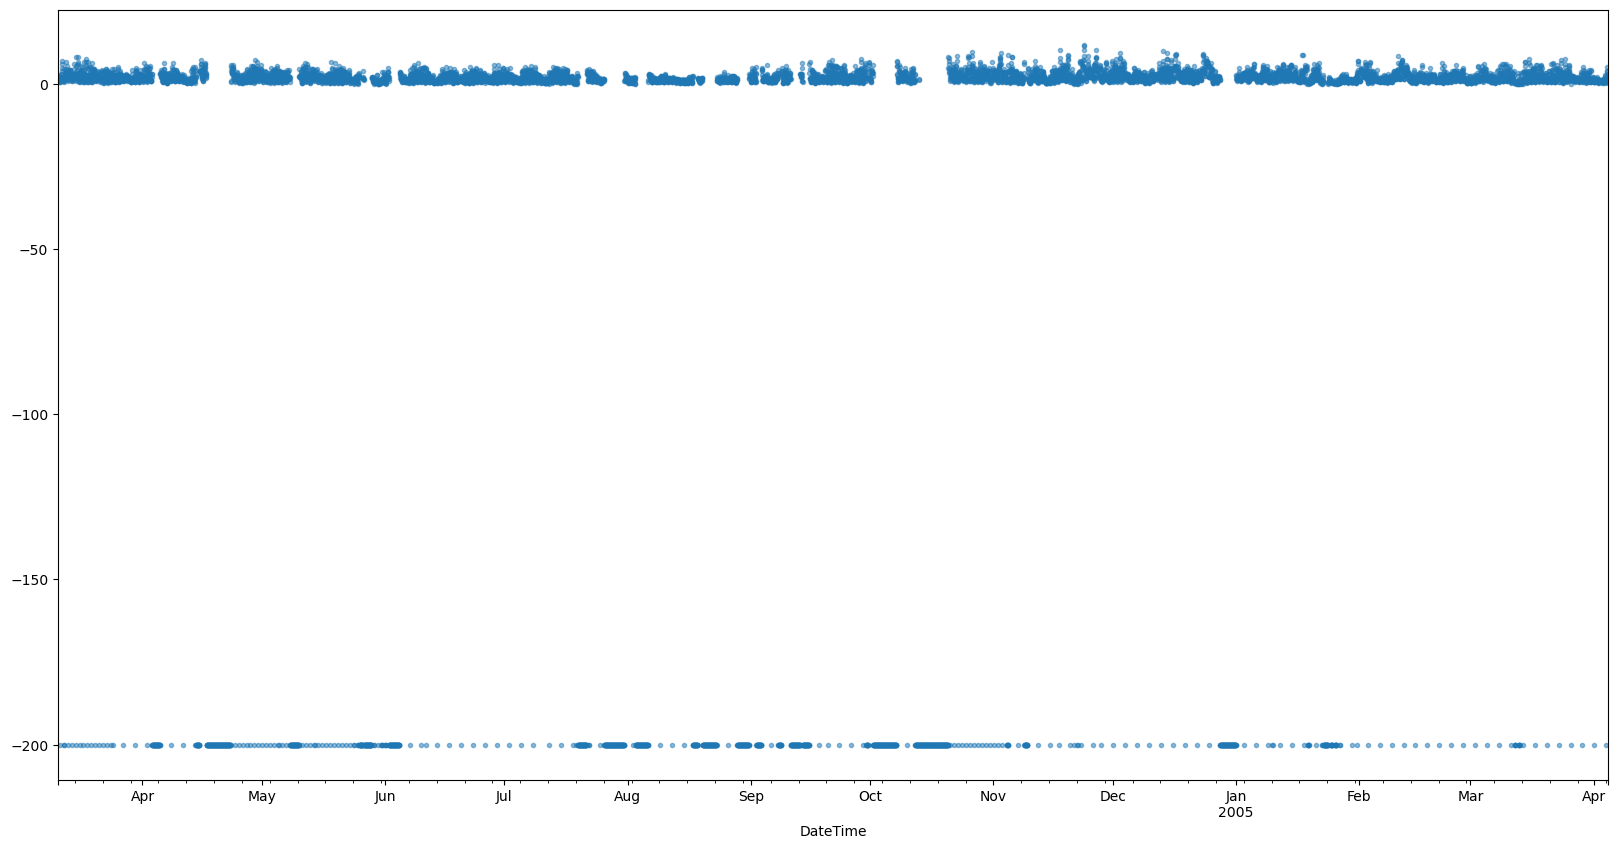

In [67]:
plt.figure(figsize=(20,10))
df['CO(GT)'].plot(marker='.', alpha=0.5, linestyle='None')


In [68]:
cols = ['CO(GT)',	'CO_s',	'NMHC(GT)',	'NMHC_s','C6H6(GT)',	'NOx(GT)',	'NOx_s',	'NO2(GT)',	'NO2_s',	'O3_s']
cols_gt = ['CO(GT)',	'NMHC(GT)','C6H6(GT)',	'NOx(GT)',	'NO2(GT)']


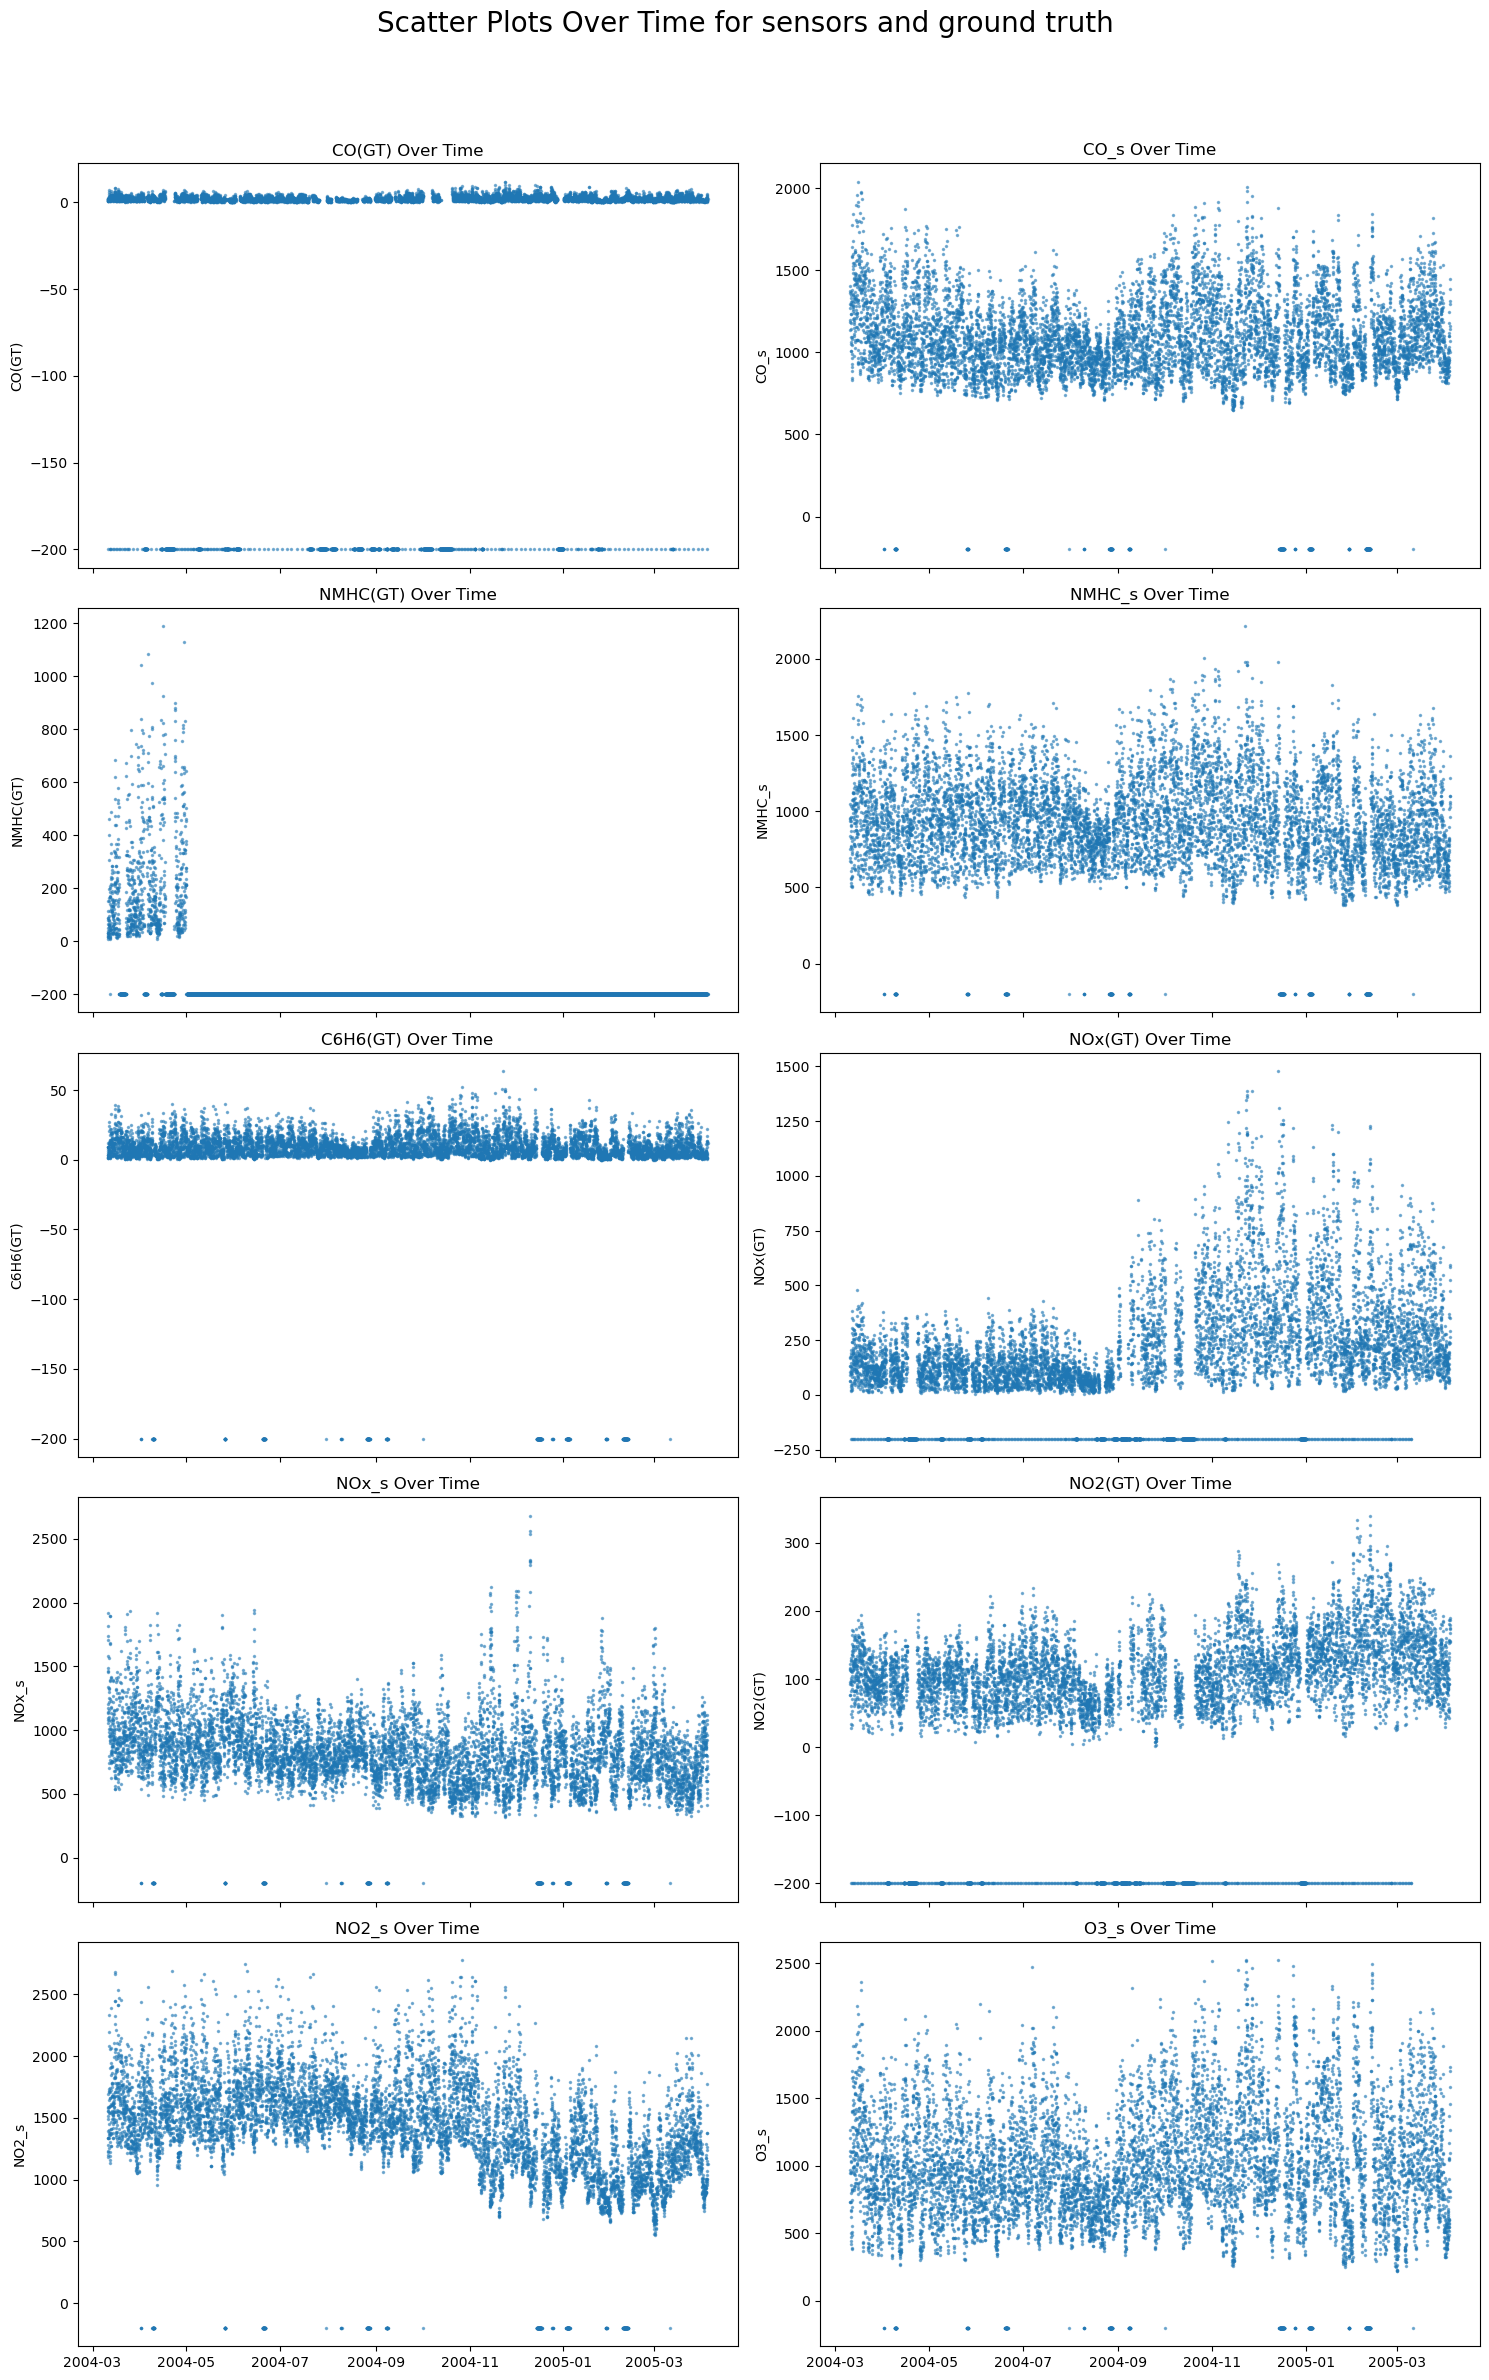

In [69]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25), sharex=True)
fig.suptitle('Scatter Plots Over Time for sensors and ground truth', fontsize=20)

for ax, col in zip(axes.flatten(), cols):
    ax.plot(df.index, df[col], marker='.', ms=3, alpha=0.5, linestyle='None')
    ax.set_ylabel(col)
    ax.set_title(f'{col} Over Time')

for i in range(len(cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

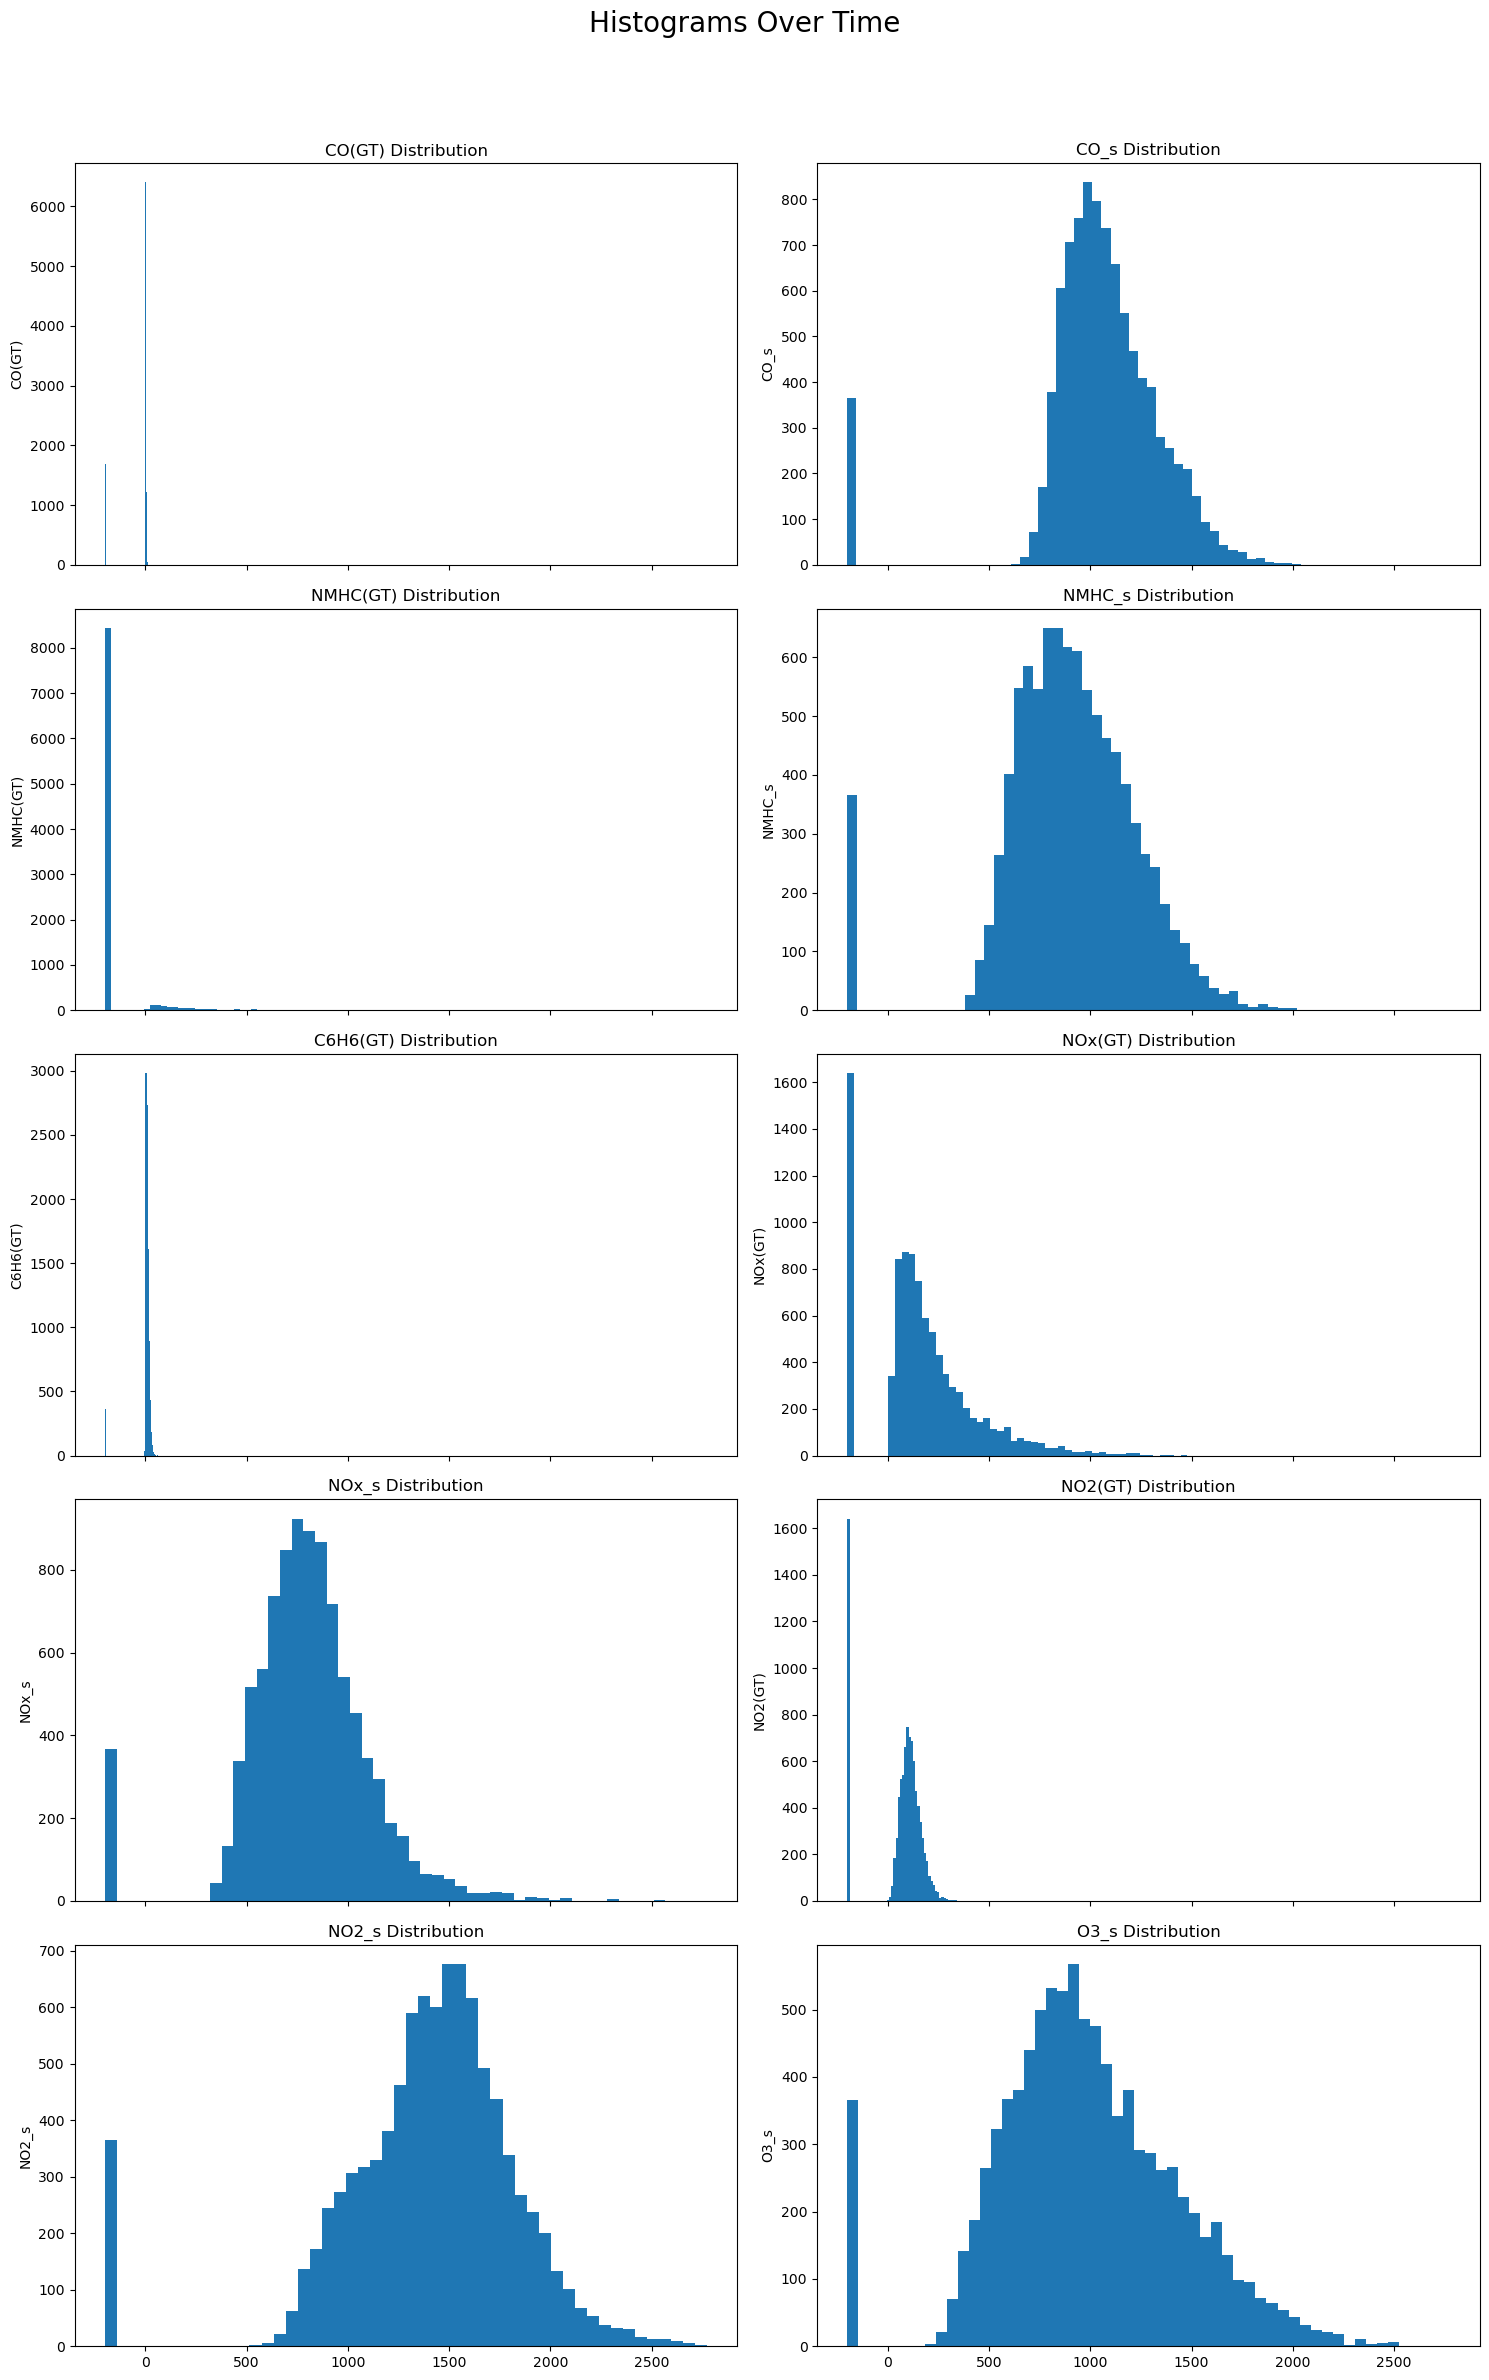

In [70]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25), sharex=True)
fig.suptitle('Histograms Over Time', fontsize=20)

for ax, col in zip(axes.flatten(), cols):
    ax.hist(df[col], bins=50)
    ax.set_ylabel(col)
    ax.set_title(f'{col} Distribution')

for i in range(len(cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [71]:
df[ 'NMHC(GT)'] == -200
   

DateTime
2004-03-10 18:00:00    False
2004-03-10 19:00:00    False
2004-03-10 20:00:00    False
2004-03-10 21:00:00    False
2004-03-10 22:00:00    False
                       ...  
2005-04-04 10:00:00     True
2005-04-04 11:00:00     True
2005-04-04 12:00:00     True
2005-04-04 13:00:00     True
2005-04-04 14:00:00     True
Name: NMHC(GT), Length: 9357, dtype: bool

In [72]:
df[df[ 'NMHC(GT)'] == -200]
   

,CO(GT),CO_s,NMHC(GT),C6H6(GT),NMHC_s,NOx(GT),NOx_s,NO2(GT),NO2_s,O3_s,T,RH,AH,hour,day,month,year
DateTime,,,,,,,,,,,,,,,,,
2004-03-12 09:00:00,-200.0,1545.0,-200.0,22.1,1353.0,-200.0,767.0,-200.0,2058.0,1588.0,9.2,56.2,0.6561,9,Friday,3,2004
2004-03-18 10:00:00,4.5,1617.0,-200.0,21.3,1333.0,349.0,686.0,150.0,2010.0,1819.0,17.8,40.5,0.8210,10,Thursday,3,2004
2004-03-18 11:00:00,2.8,1473.0,-200.0,14.3,1127.0,224.0,831.0,152.0,1752.0,1568.0,20.8,34.4,0.8365,11,Thursday,3,2004
2004-03-18 12:00:00,2.2,1379.0,-200.0,12.5,1068.0,171.0,899.0,139.0,1663.0,1374.0,23.8,28.2,0.8219,12,Thursday,3,2004
2004-03-18 13:00:00,2.2,1385.0,-200.0,12.2,1056.0,149.0,891.0,133.0,1648.0,1268.0,24.2,28.7,0.8515,13,Thursday,3,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,Monday,4,2005
2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,Monday,4,2005
2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,Monday,4,2005


## Valori mancanti

In [73]:
counts = {}
for e in cols:
   counts[e] =  (df[e] == -200).sum()

print(counts)


{'CO(GT)': 1683, 'CO_s': 366, 'NMHC(GT)': 8443, 'NMHC_s': 366, 'C6H6(GT)': 366, 'NOx(GT)': 1639, 'NOx_s': 366, 'NO2(GT)': 1642, 'NO2_s': 366, 'O3_s': 366}


In [74]:
sorted(counts.items())

[('C6H6(GT)', 366),
 ('CO(GT)', 1683),
 ('CO_s', 366),
 ('NMHC(GT)', 8443),
 ('NMHC_s', 366),
 ('NO2(GT)', 1642),
 ('NO2_s', 366),
 ('NOx(GT)', 1639),
 ('NOx_s', 366),
 ('O3_s', 366)]

In [75]:
df.replace(-200, np.nan, inplace=True)


In [76]:
df.isna().sum()

CO(GT)      1683
CO_s         366
NMHC(GT)    8443
C6H6(GT)     366
NMHC_s       366
NOx(GT)     1639
NOx_s        366
NO2(GT)     1642
NO2_s        366
O3_s         366
T            366
RH           366
AH           366
hour           0
day            0
month          0
year           0
dtype: int64

In [77]:
df = df.drop('NMHC(GT)' ,axis=1)

In [78]:
df = df.fillna(method="bfill")

In [79]:
df.isna().sum()

CO(GT)      0
CO_s        0
C6H6(GT)    0
NMHC_s      0
NOx(GT)     0
NOx_s       0
NO2(GT)     0
NO2_s       0
O3_s        0
T           0
RH          0
AH          0
hour        0
day         0
month       0
year        0
dtype: int64

## Stagionalità

In [80]:
cols_gt_2 = ['CO(GT)','C6H6(GT)',	'NOx(GT)',	'NO2(GT)']


In [81]:
for e in cols_gt:
   print(e)

CO(GT)
NMHC(GT)
C6H6(GT)
NOx(GT)
NO2(GT)


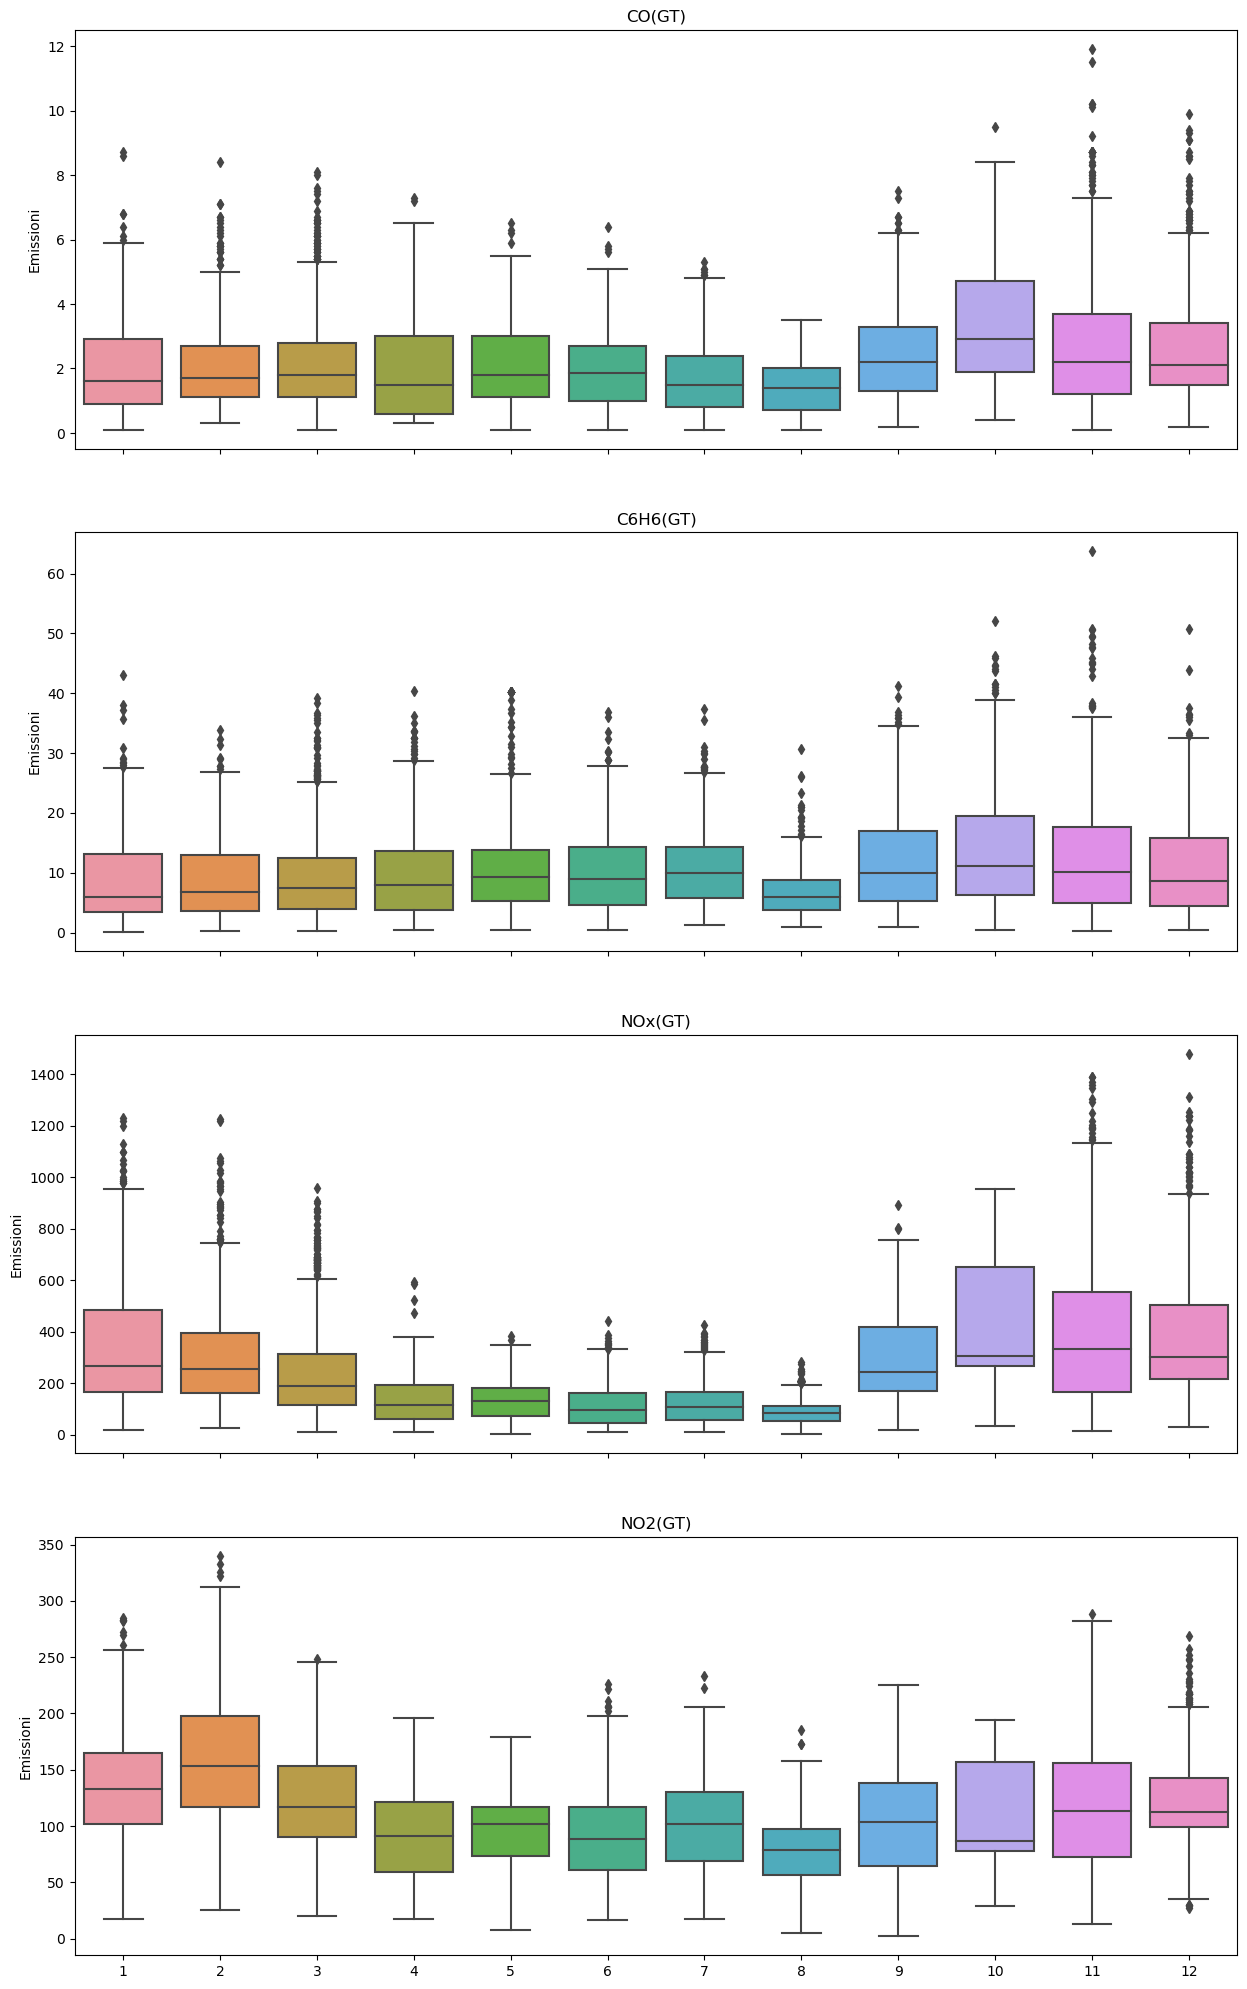

In [82]:
fig, axes = plt.subplots(4, 1, figsize=(15, 25), sharex=True)
for name, ax in zip(cols_gt_2, axes):
    sns.boxplot(data=df, x='month', y=name, ax=ax)
    ax.set_ylabel('Emissioni')
    ax.set_title(name)
    ax.set_xlabel('')


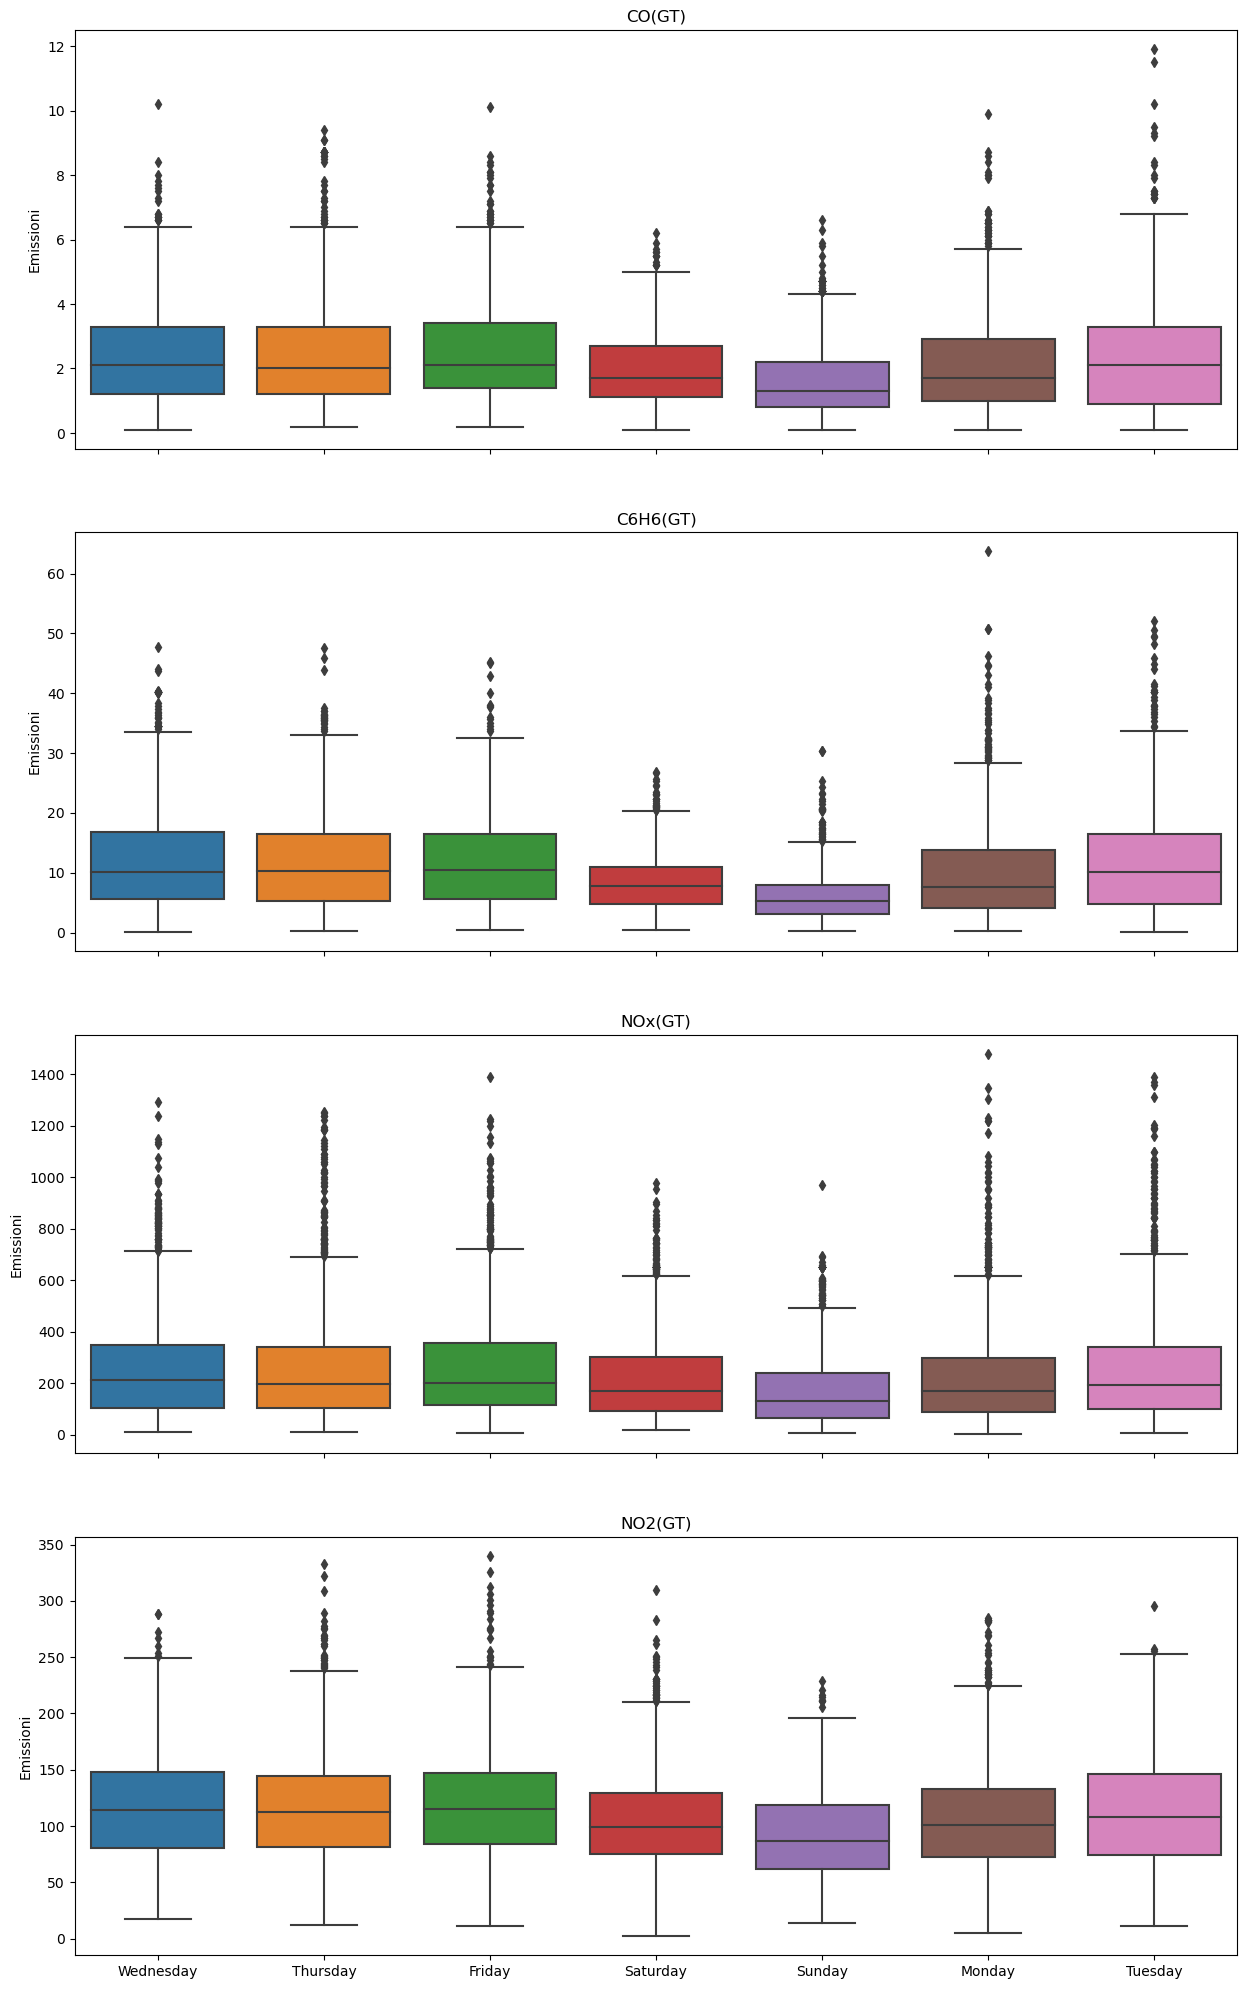

In [83]:
fig, axes = plt.subplots(4, 1, figsize=(15, 25), sharex=True)
for name, ax in zip(cols_gt_2, axes):
    sns.boxplot(data=df, x='day', y=name, ax=ax)
    ax.set_ylabel('Emissioni')
    ax.set_title(name)
    ax.set_xlabel('')

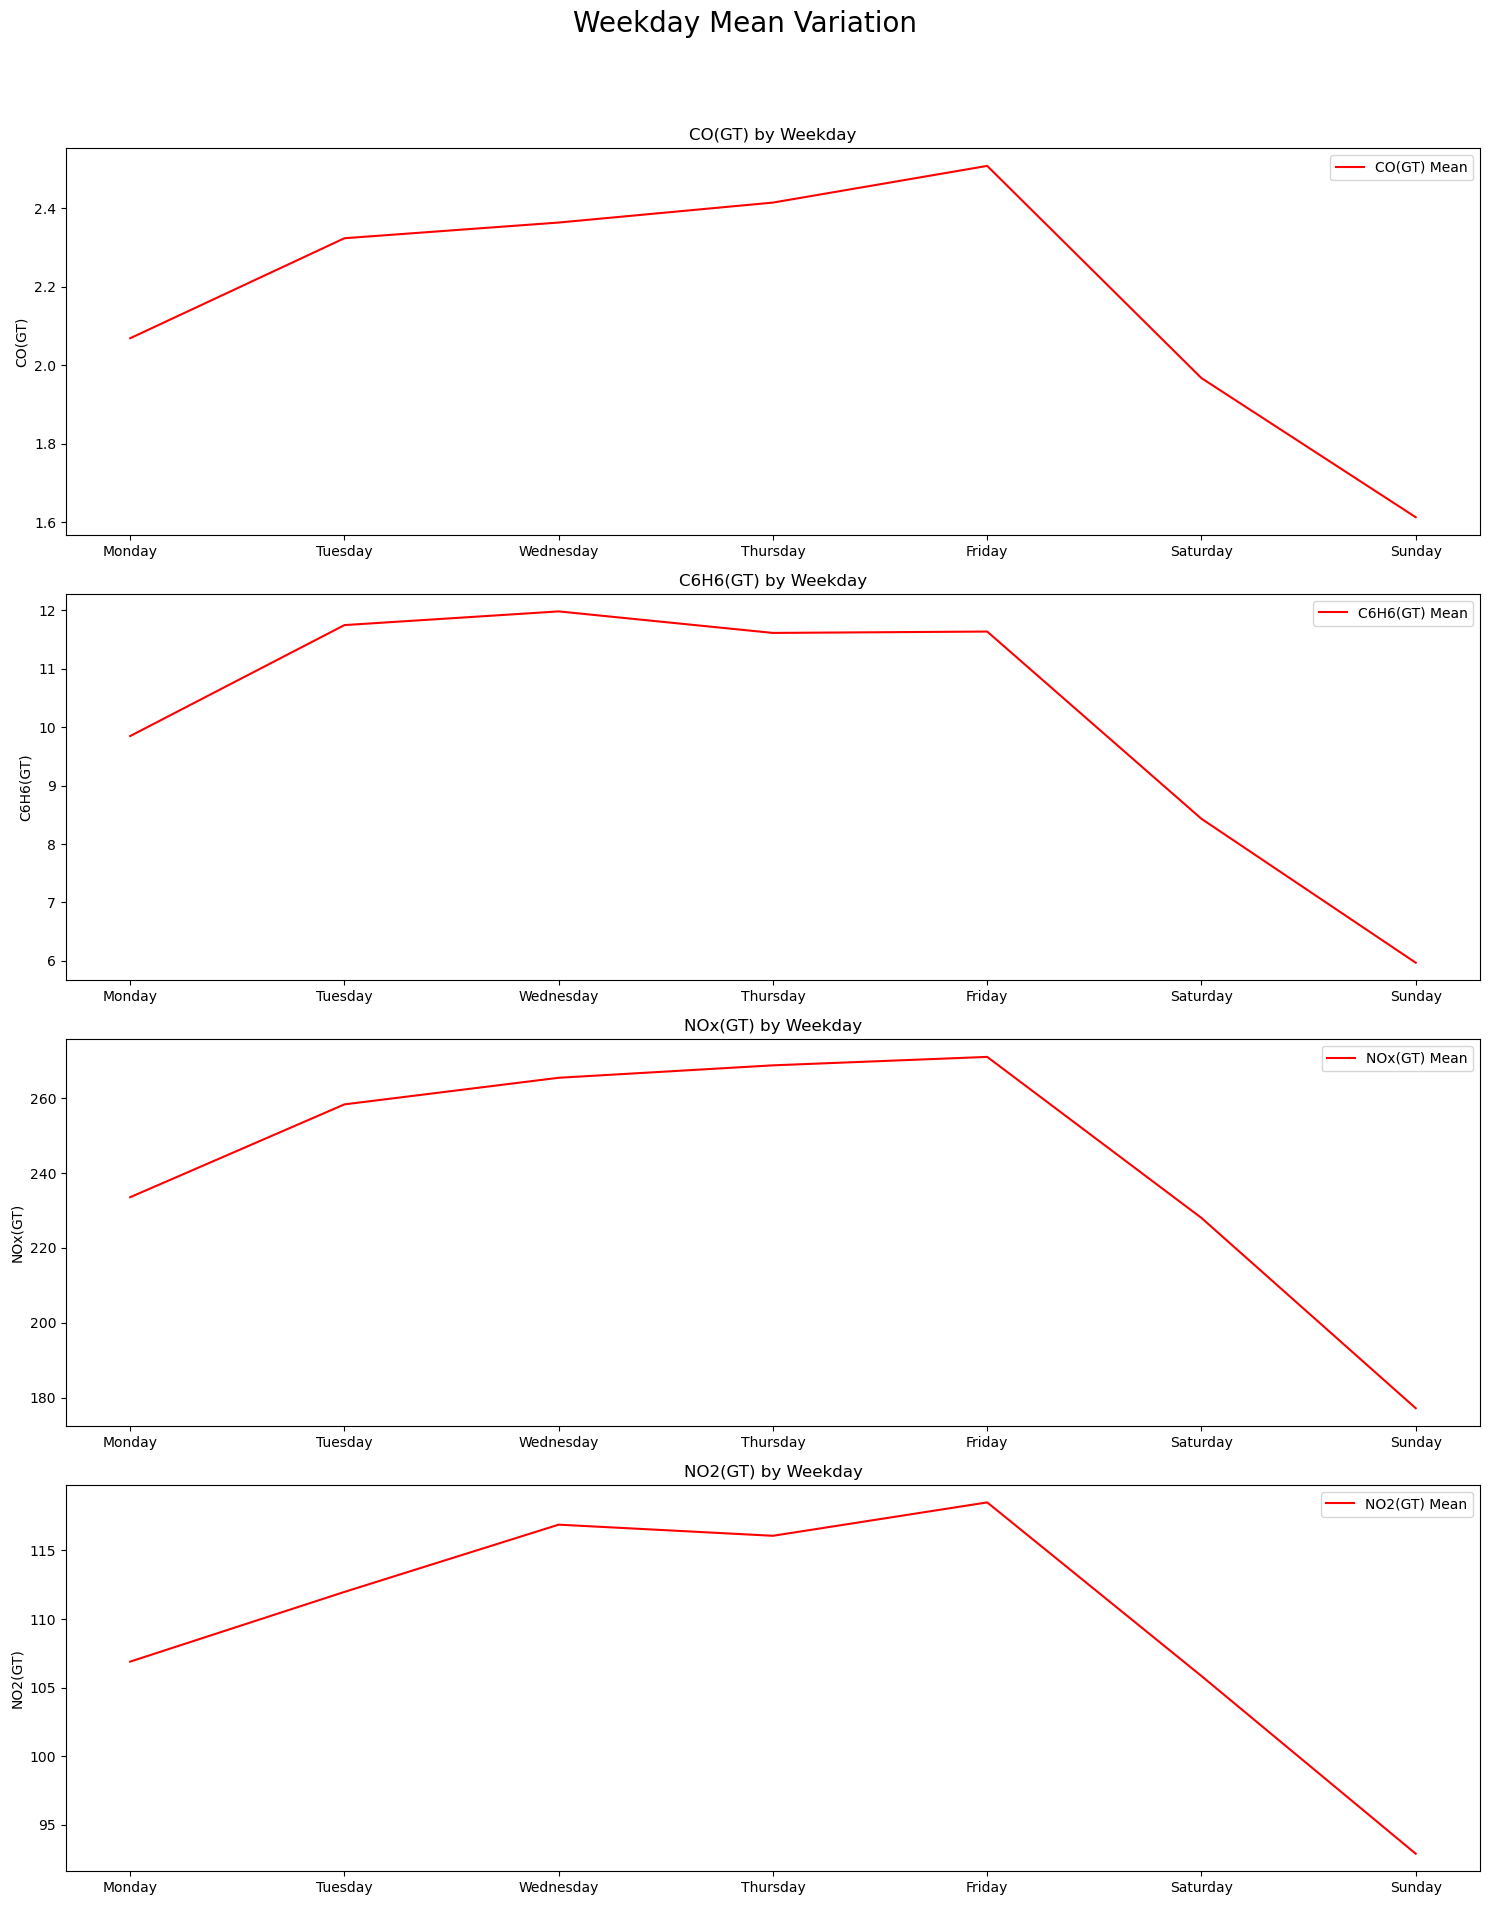

In [84]:
fig, axes = plt.subplots(nrows=len(cols_gt_2), ncols=1, figsize=(15, 5 * len(cols_gt_2)))
fig.suptitle('Weekday Mean Variation', fontsize=20)

def plot_weekday_variation(col, ax):
    weekday_stats = df.groupby('day')[col].agg([np.mean, np.std]).reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    ax.plot(weekday_stats.index, weekday_stats['mean'], label=f'{col} Mean', color='red')

    ax.set_title(f'{col} by Weekday')
    ax.set_ylabel(col)
    ax.legend()


for i, col in enumerate(cols_gt_2):
    plot_weekday_variation(col, axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



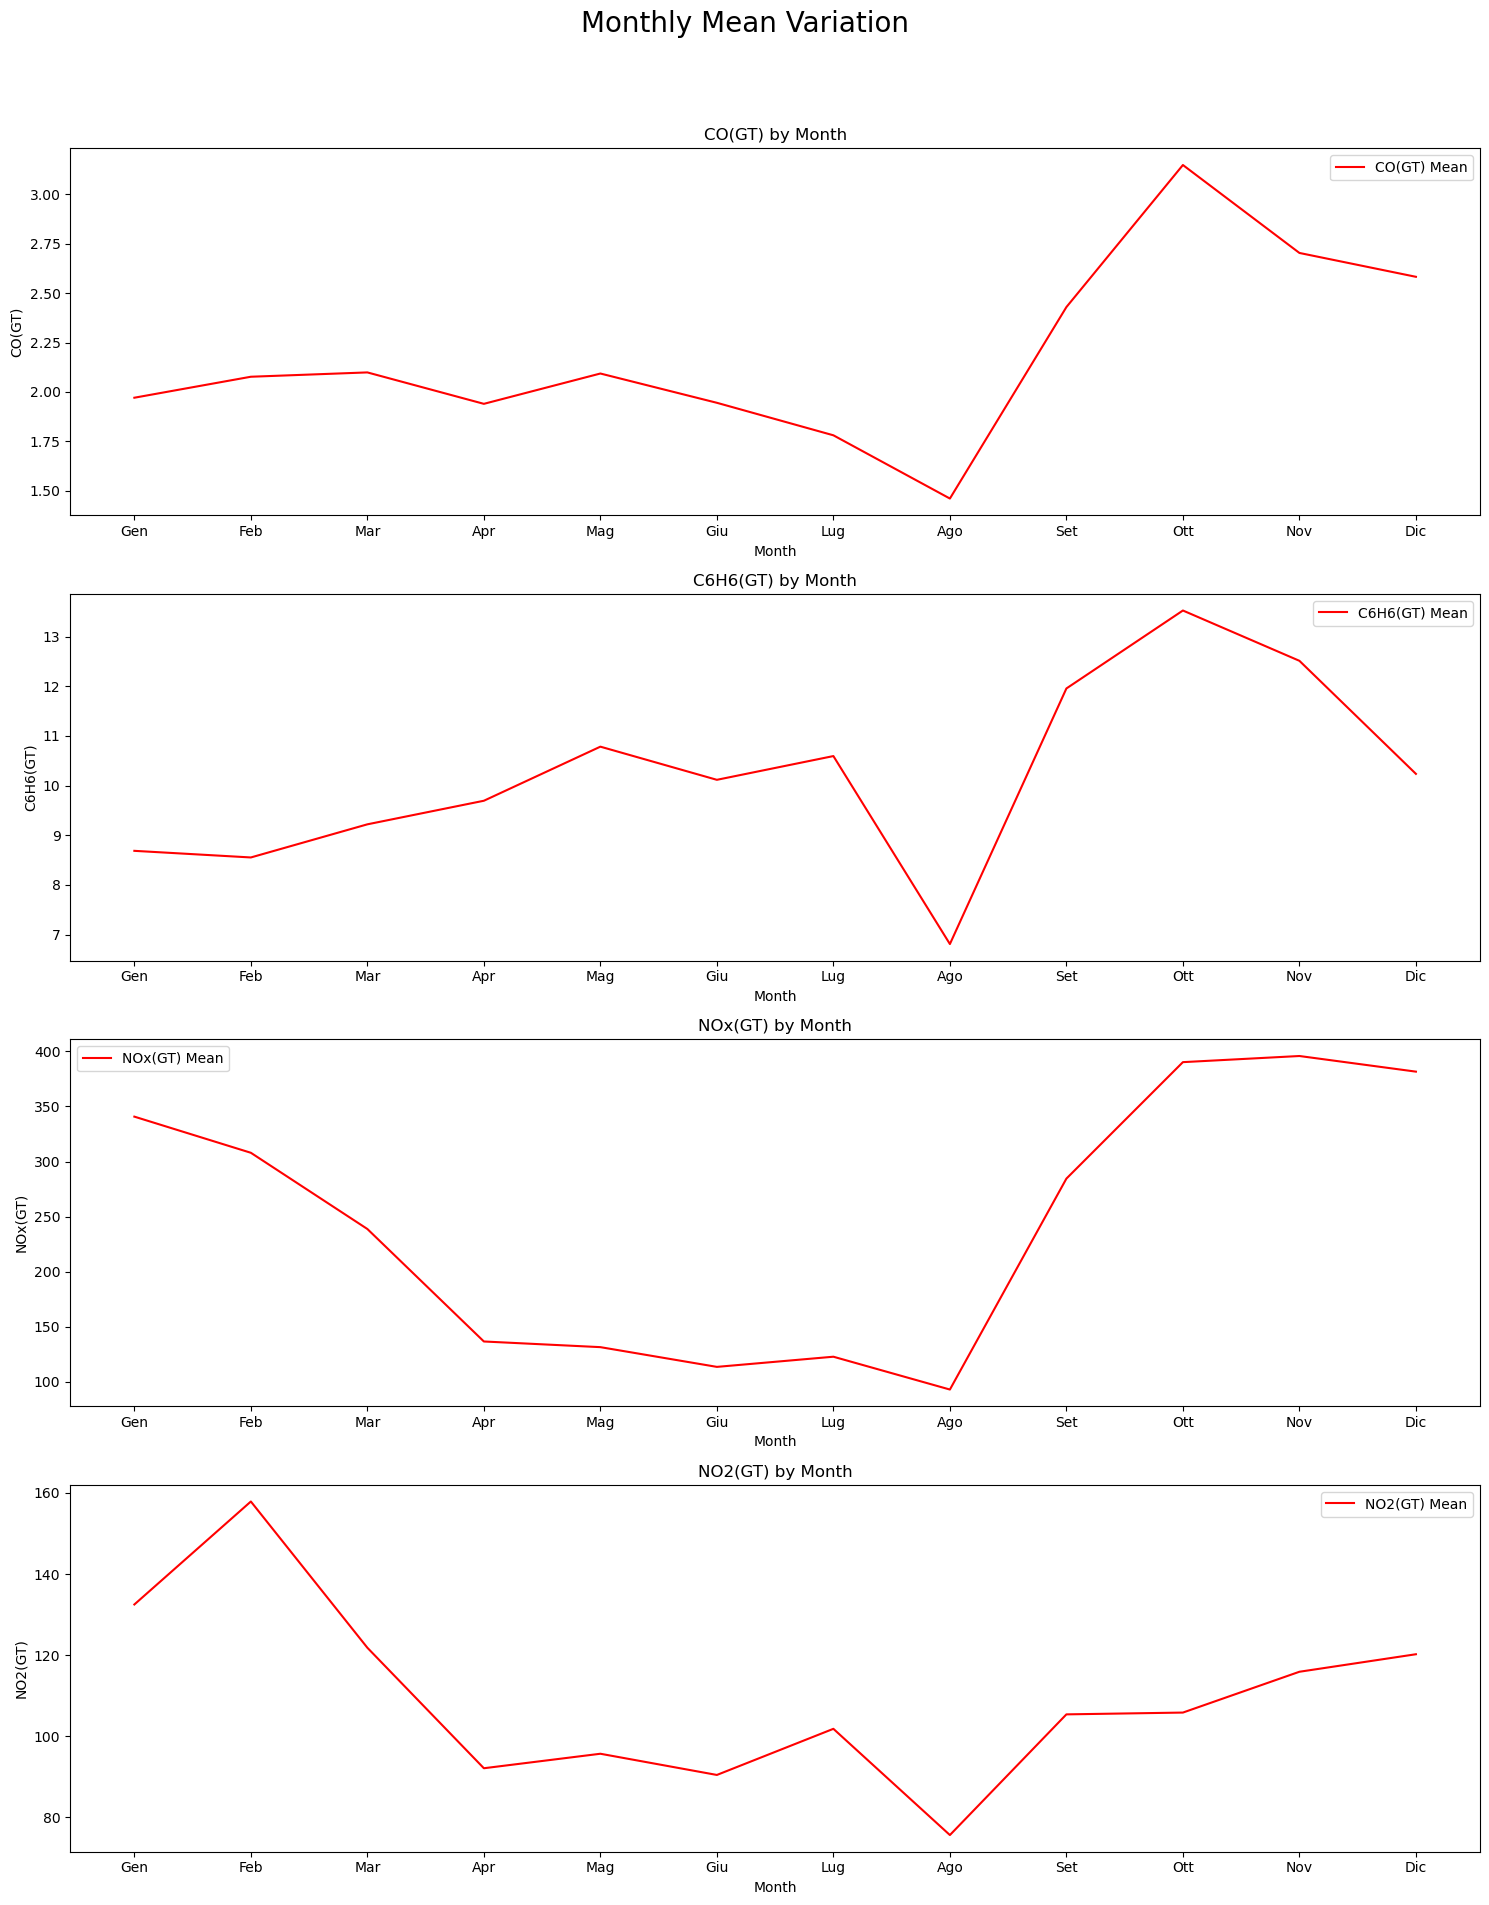

In [95]:
fig, axes = plt.subplots(nrows=len(cols_gt_2), ncols=1, figsize=(15, 5 * len(cols_gt_2)))
fig.suptitle('Monthly Mean Variation', fontsize=20)

def plot_monthly_variation(col, ax):
    monthly_stats = df.groupby('month')[col].agg([np.mean, np.std])

    ax.plot(monthly_stats.index, monthly_stats['mean'], label=f'{col} Mean', color='red')

    ax.set_xticks(np.arange(1, 13), ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
    ax.set_title(f'{col} by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(col)
    ax.legend()

for i, col in enumerate(cols_gt_2):
    plot_monthly_variation(col, axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



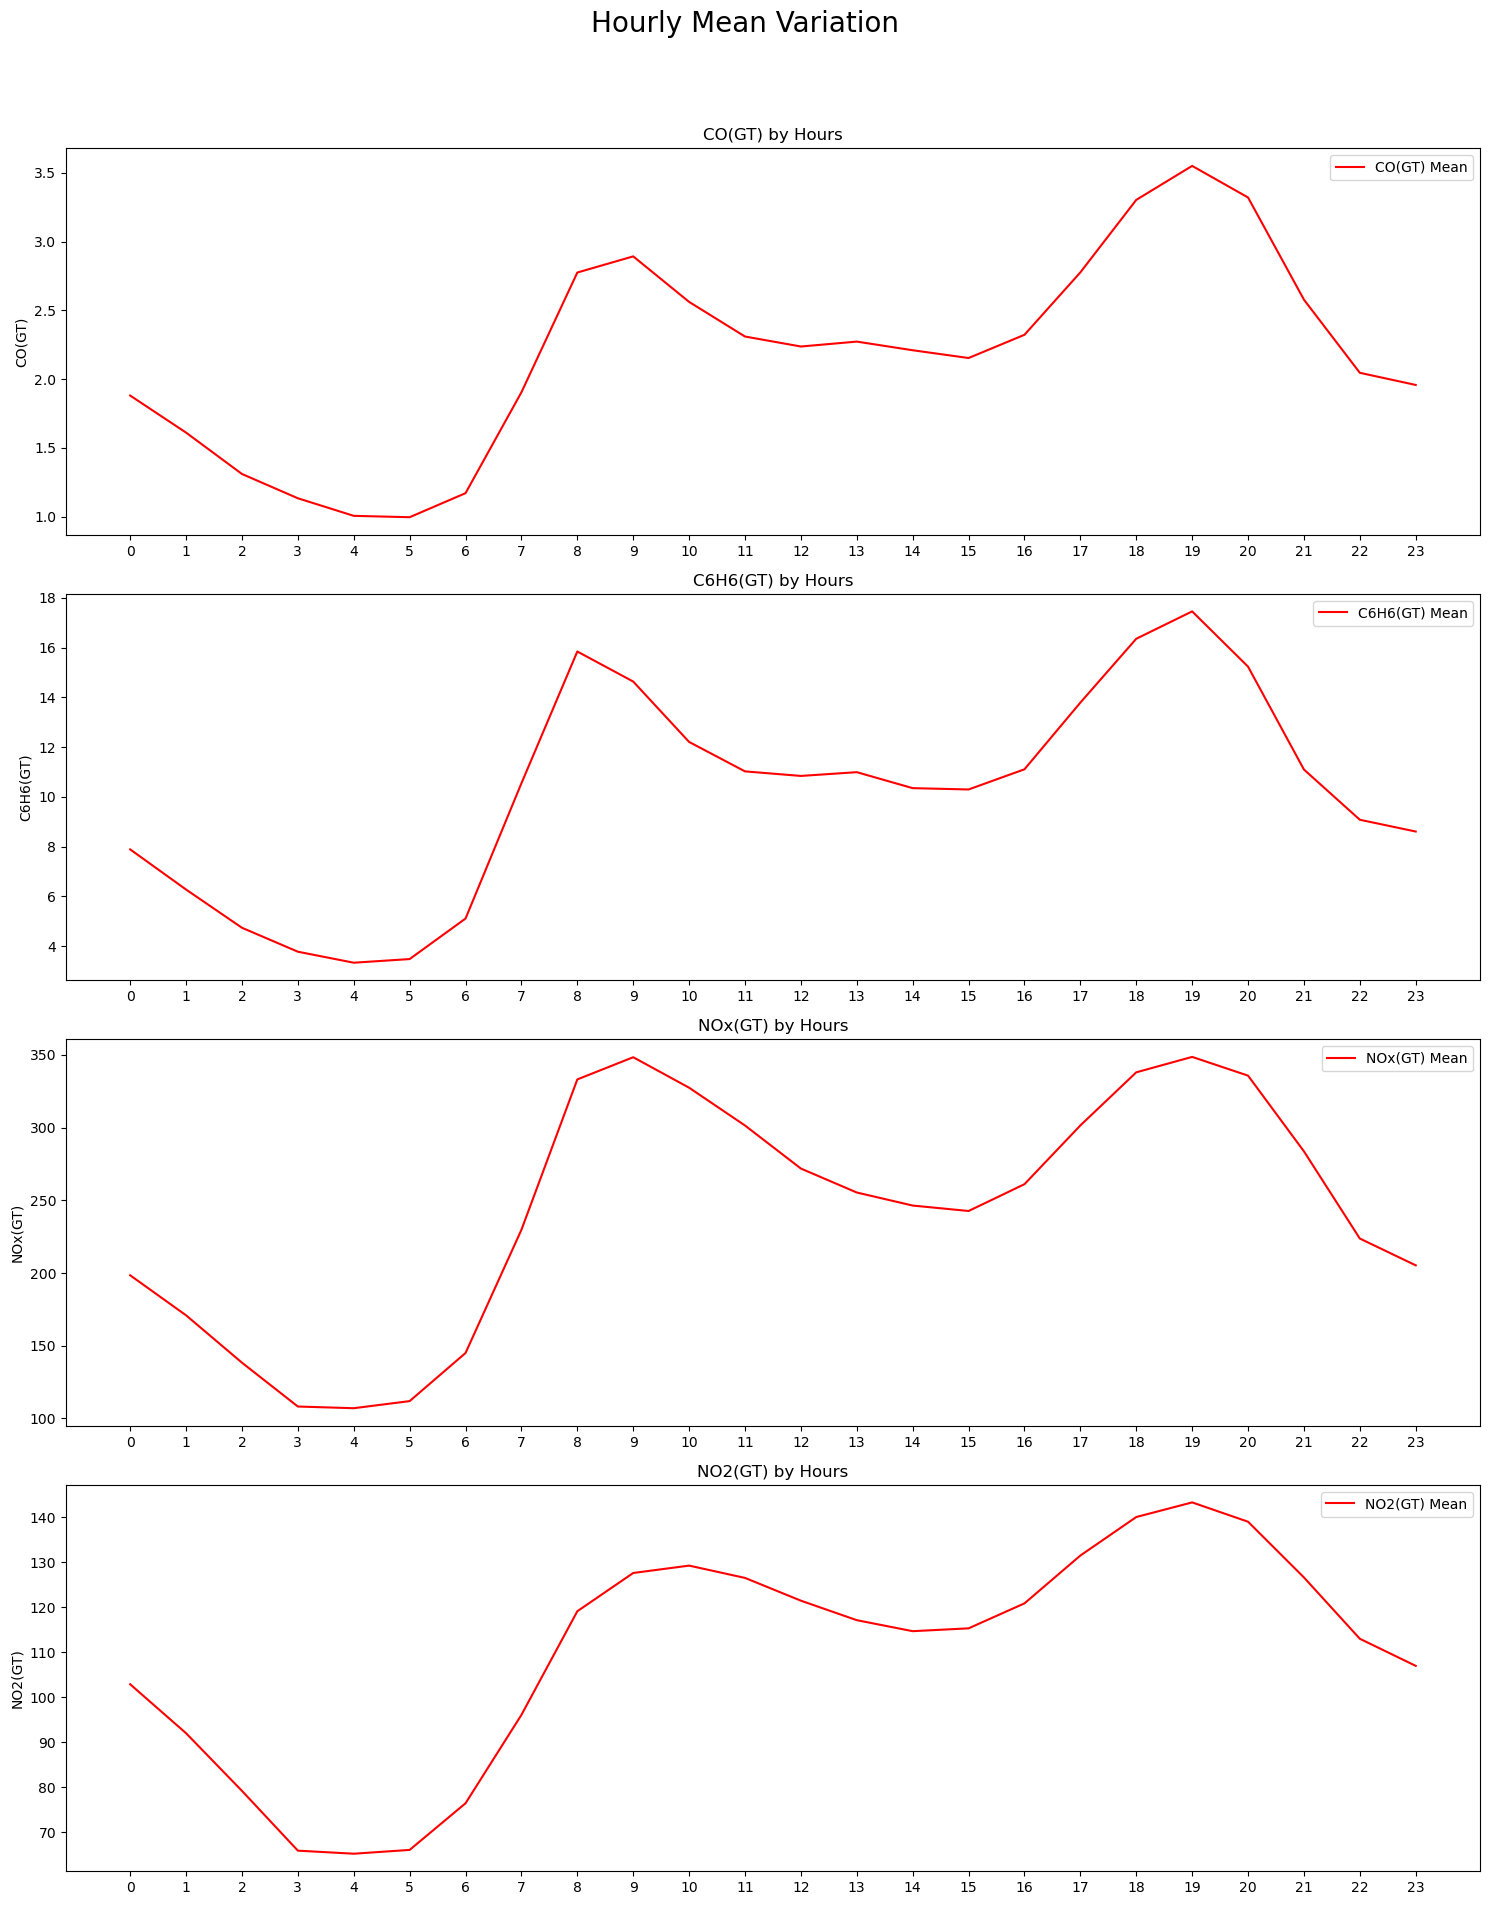

In [101]:
fig, axes = plt.subplots(nrows=len(cols_gt_2), ncols=1, figsize=(15, 5 * len(cols_gt_2)))
fig.suptitle('Hourly Mean Variation', fontsize=20)

def plot_hour_variation(col, ax):
    hour_stats = df.groupby('hour')[col].agg([np.mean, np.std])

    ax.plot(hour_stats.index, hour_stats['mean'], label=f'{col} Mean', color='red')

    # Titolo e etichette
    ax.set_xticks(np.arange(24))
    ax.set_title(f'{col} by Hours')
    ax.set_ylabel(col)
    ax.legend()

# Tracciare i grafici per ogni colonna
for i, col in enumerate(cols_gt_2):
    plot_hour_variation(col, axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [96]:
monthly_temp_stats = df.groupby(df.index.month)['T'].agg([np.mean, np.std])
monthly_temp_stats

,mean,std
DateTime,,
1,8.235484,3.774185
2,7.270387,3.308234
3,13.698644,5.710333
4,16.668154,4.875150
5,20.283468,5.163229
6,26.076667,6.041273
7,29.414113,6.170954
8,28.569624,5.493625
9,24.680139,5.466950


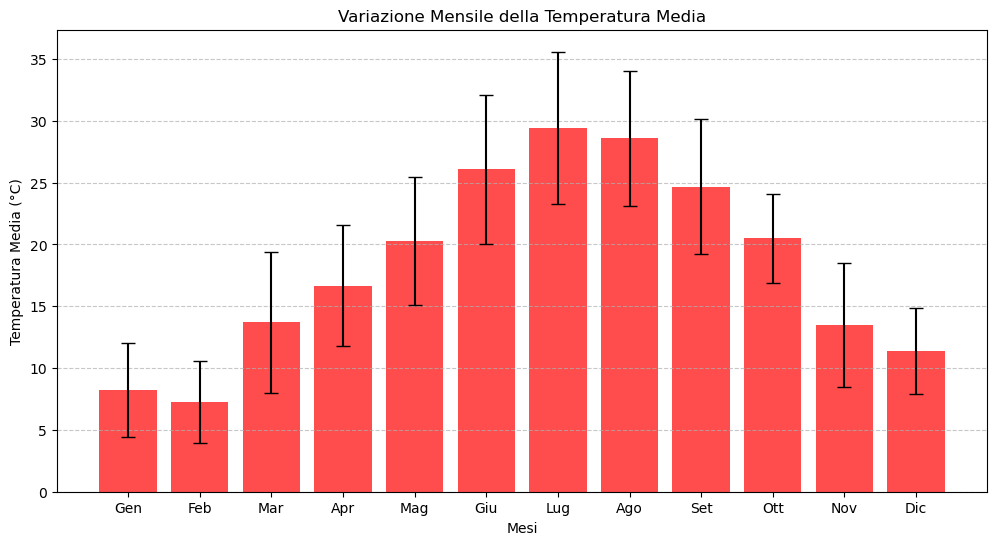

In [97]:

# Creare un grafico a barre per visualizzare la temperatura media mensile
plt.figure(figsize=(12, 6))
plt.bar(monthly_temp_stats.index, monthly_temp_stats['mean'], yerr=monthly_temp_stats['std'], capsize=5, color='red', alpha=0.7)

# Aggiungere etichette e titolo
plt.xticks(np.arange(1, 13), ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
plt.xlabel('Mesi')
plt.ylabel('Temperatura Media (°C)')
plt.title('Variazione Mensile della Temperatura Media')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Correlazioni?

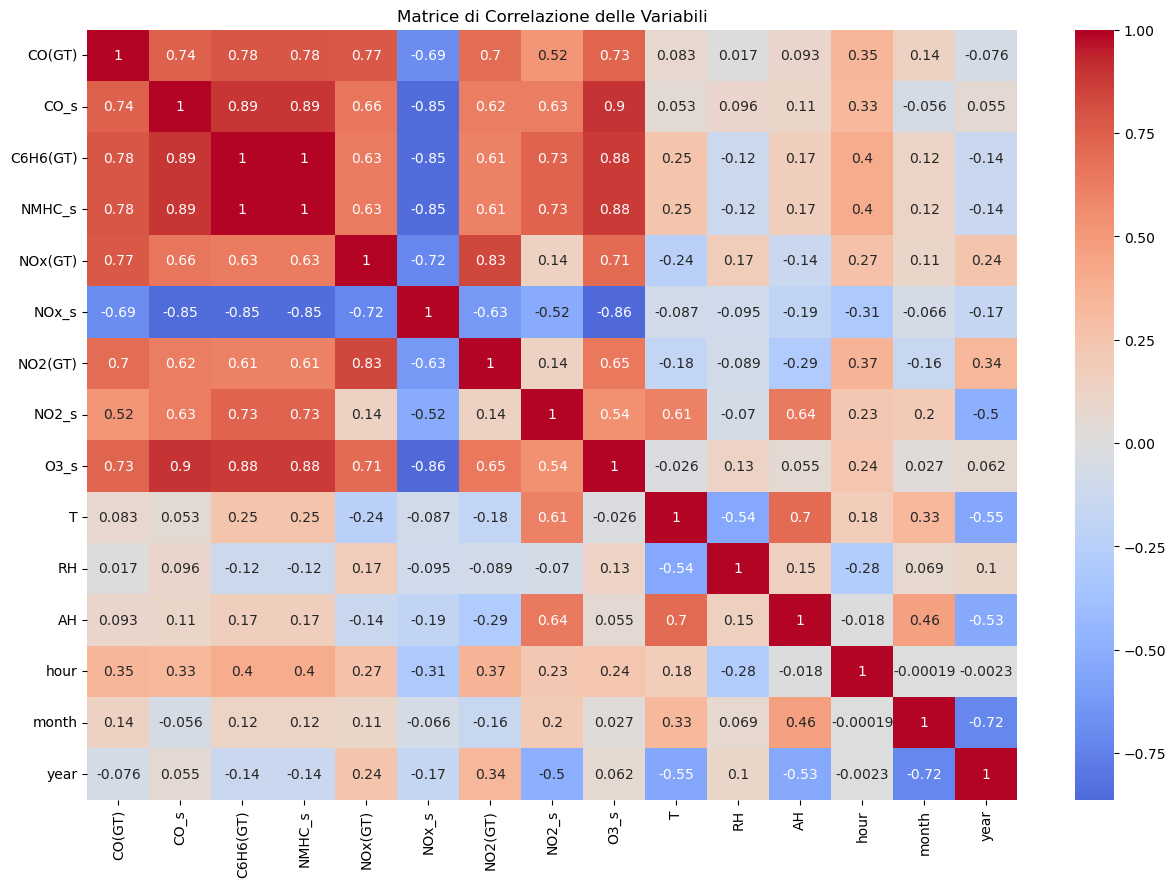

In [91]:
corr_matrix = df.corr(method="spearman", numeric_only=True)

# Creare una heatmap della matrice di correlazione
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione delle Variabili')
plt.show()


## Confronti tra variabili

In [ ]:
fig, axes = plt.subplots(nrows=len(cols_gt_2), ncols=1, figsize=(15, 5 * len(cols_gt_2)))
fig.suptitle('Hourly Mean Variation', fontsize=20)

def plot_hour_variation(col, ax):
    hour_stats = df.groupby('hour')[col].agg([np.mean, np.std])

    ax.plot(hour_stats.index, hour_stats['mean'], label=f'{col} Mean', color='red')

    # Titolo e etichette
    ax.set_xticks(np.arange(24))
    ax.set_title(f'{col} by Hours')
    ax.set_ylabel(col)
    ax.legend()

# Tracciare i grafici per ogni colonna
for i, col in enumerate(cols_gt_2):
    plot_hour_variation(col, axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

